In [1]:
from torchvision import models

In [2]:
import torch

In [3]:
alexnet = models.vgg16(pretrained=True)

In [4]:
print(alexnet)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [5]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )
])

In [6]:
weight_layer_no = 10
param = 0.5

x = alexnet.features[weight_layer_no].weight
std = torch.std(x)
y = abs(x) < (param * std)
prunable = y.sum().item()
percent = (prunable / x.numel()) * 100
prunable, percent

(127682, 43.29494900173611)

In [7]:
for a, b in enumerate(alexnet.features):
    print(a, b)

0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1 ReLU(inplace)
2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
3 ReLU(inplace)
4 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
5 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
6 ReLU(inplace)
7 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
8 ReLU(inplace)
9 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
10 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
11 ReLU(inplace)
12 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
13 ReLU(inplace)
14 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
15 ReLU(inplace)
16 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
17 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
18 ReLU(inplace)
19 Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
20 ReLU

In [8]:
# Activation Sparsity

In [9]:
import torch.nn as nn

class AlexNet(torch.nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        features = list(alexnet.features)
        self.features = nn.ModuleList(features).eval() 
        
    def forward(self, x):
        results = []
        for ii,model in enumerate(self.features):
            x = model(x)
            if isinstance(model, nn.ReLU):
                results.append(x)
        alex_outputs = namedtuple("AlexOutputs", ['conv' + str(i) for i in range(len(results))])
        return alex_outputs(*results)

In [58]:
from torchvision import datasets
dataset = datasets.ImageFolder(root='C:\\Data', transform=transform)

In [59]:
from collections import namedtuple

In [60]:
import matplotlib.pyplot as plt

In [87]:
image_no = 1
layer_no = 10
feature_no = 510

print(len(results))

13


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

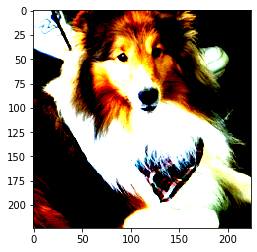

In [88]:
plt.imshow(torch.transpose(torch.transpose(dataset[image_no][0], dim0 = 0, dim1 = 2), dim0 = 0, dim1 = 1))
plt.plot()

[]

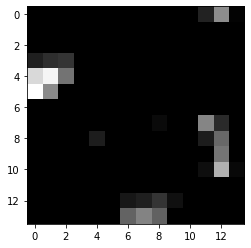

In [89]:
net = AlexNet()
results = net(dataset[image_no][0].unsqueeze(0))
out = results[layer_no].squeeze(0)[feature_no].detach().numpy()
plt.imshow(out, cmap = 'gray')
plt.plot()

In [90]:
out.shape

(14, 14)

In [91]:
sparsity = (out == 0).sum() / (out.shape[0] * out.shape[1]) * 100
sparsity

85.71428571428571

In [23]:
# Average sparsity calculation for entire layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

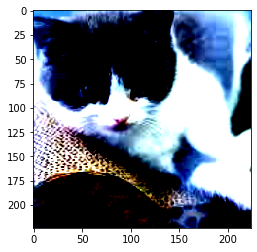

In [24]:
image_no = 2
layer_no = 0

plt.imshow(torch.transpose(torch.transpose(dataset[image_no][0], dim0 = 0, dim1 = 2), dim0 = 0, dim1 = 1))
plt.plot()

In [25]:
net = AlexNet()
results = net(dataset[image_no][0].unsqueeze(0))

layer_mat = results[layer_no].squeeze(0)
num_features = layer_mat.shape[0]

print(num_features)

sparsity = 0
for feature_no in range(num_features):  
    out = layer_mat[feature_no].detach().numpy()
    sparsity +=  (out == 0).sum() / (out.shape[0] * out.shape[1]) * 100

sparsity = sparsity / num_features

sparsity

64


40.7363580197704